In [ ]:
!pip install opendatasets


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abibatanveer20
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


100%|██████████| 612M/612M [00:03<00:00, 196MB/s]


In [ ]:
import os

data_dir = "/content/gtsrb-german-traffic-sign"
print(os.listdir(data_dir))


['Meta', 'Train.csv', 'Meta.csv', 'test', 'Test.csv', 'Train', 'meta', 'Test', 'train']


In [ ]:
import pandas as pd

# CSV files read karo
train_csv = pd.read_csv("/content/gtsrb-german-traffic-sign/Train.csv")
test_csv = pd.read_csv("/content/gtsrb-german-traffic-sign/Test.csv")

# Top 5 rows check
print(train_csv.head())


   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  


In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
images = []
labels = []

for i, row in train_csv.iterrows():
    img = cv2.imread('/content/gtsrb-german-traffic-sign/' + row['Path'])
    img = cv2.resize(img, (30, 30))
    images.append(img)
    labels.append(row['ClassId'])

X = np.array(images)
y = np.array(labels)

print("Images shape:", X.shape)
print("Labels shape:", y.shape)


Images shape: (39209, 30, 30, 3)
Labels shape: (39209,)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

num_classes = 43

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize images (0-255 -> 0-1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)


X_train shape: (31367, 30, 30, 3) y_train shape: (31367, 43)
X_test shape: (7842, 30, 30, 3) y_test shape: (7842, 43)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = 43

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=10,
    verbose=1
)


Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 36s 71ms/step - accuracy: 0.2762 - loss: 2.7281 - val_accuracy: 0.8213 - val_loss: 0.6494
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - accuracy: 0.7523 - loss: 0.7886 - val_accuracy: 0.9417 - val_loss: 0.2454
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.8596 - loss: 0.4529 - val_accuracy: 0.9569 - val_loss: 0.1542
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.8935 - loss: 0.3332 - val_accuracy: 0.9805 - val_loss: 0.0998
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.9211 - loss: 0.2480 - val_accuracy: 0.9847 - val_loss: 0.0721
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 42s 73ms/step - accuracy: 0.9392 - loss: 0.1933 - val_accuracy: 0.9830 - val_loss: 0.0671
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step - accuracy: 0.9473 - loss: 0.1681 - val_accuracy: 0.9867 - val_loss: 0.0513
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.9532 - loss: 0.1441 - 

246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


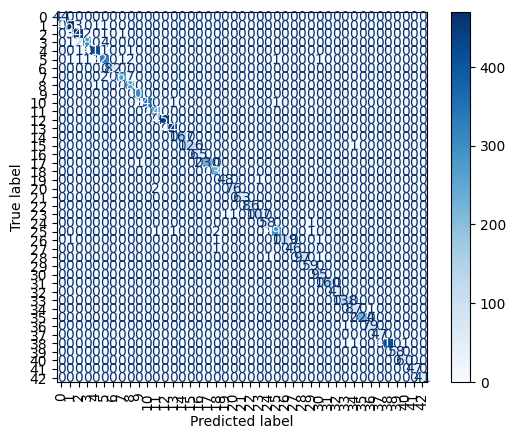

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Model predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.show()


In [ ]:
import numpy as np

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # predicted labels
y_true = np.argmax(y_test, axis=1)          # actual labels


246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true, y_pred_classes)
print("Test Accuracy:", acc)


Test Accuracy: 0.9912012241775058


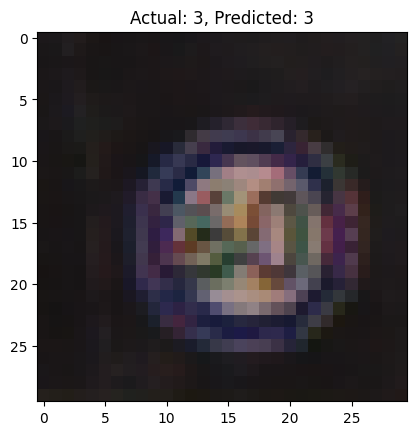

In [ ]:
import matplotlib.pyplot as plt
import random

# Random image index
idx = random.randint(0, len(X_test)-1)

plt.imshow(X_test[idx])
plt.title(f"Actual: {y_true[idx]}, Predicted: {y_pred_classes[idx]}")
plt.show()


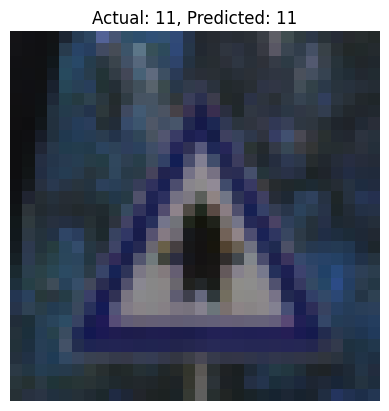

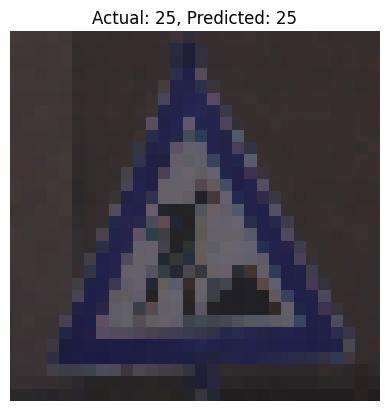

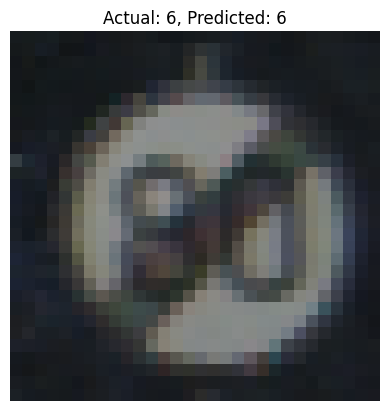

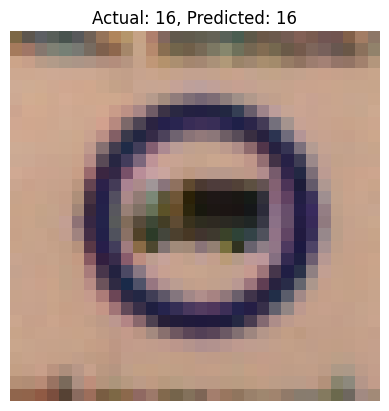

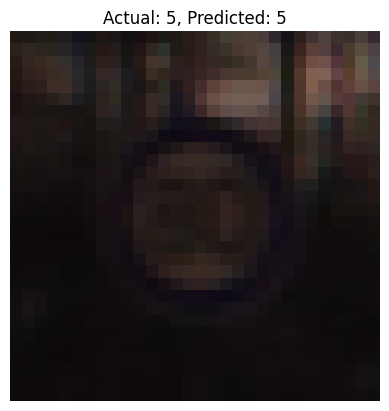

In [ ]:
import matplotlib.pyplot as plt
import random

for i in range(5):  # 5 random test images
    idx = random.randint(0, len(X_test)-1)
    plt.imshow(X_test[idx])
    plt.title(f"Actual: {y_true[idx]}, Predicted: {y_pred_classes[idx]}")
    plt.axis('off')
    plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model.save("/content/drive/MyDrive/traffic_sign_model.h5")


Mounted at /content/drive


In [ ]:
model.save("/content/drive/MyDrive/traffic_sign_model.keras")
